# Product Recomendation System

**Melakukan impolrt library/package yang digunakan dalam projek**

In [1]:
# Import package dan library yang digunakan dalam projek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

#library untuk melakukan CBF
from sklearn.feature_extraction.text import TfidfVectorizer #Untuk melakukan vektorisasi
from sklearn.metrics.pairwise import cosine_similarity # untuk menghitung Cosine Similiarity

# Library untuk Collaborative Filtering dengan Metrix Factorization
from scipy.sparse.linalg import svds

# Library untuk melakukan evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Data Overview

**Blok Kode dibawah dilakukan untuk melakukan load dataset product serta menampilkannya dalam format dataframe**

In [2]:
product = pd.read_csv('product.csv')
product

,productname,productdescription,rating,sellerid,price,stock,image,category
0,"obat pembasmi pohon dan akar, racun pohon, sta...",Nufarm Starlon Herbisida Sistemik\n\nIsi : 100...,4.900000,she-basmi,"Rp38.000,00",96653,9a6345e2-6ae6-4a44-b7cd-042a0a0e6f8b.jpg.webp....,Pestisida dan Obat tanaman
1,100ml Pestisida Organik Neem Oil /Minyak Mimba...,Takaran 1 sendok utk 1 liter larutan siap paka...,4.900000,Panda Farm,"Rp25.500,00",91,d6c84881-2df0-4211-8d33-b452a62b3005.png.webp....,Pestisida dan Obat tanaman
2,Antracol Fungisida-Obat Jamur Tanaman 70WP-250gr,Isi : 250gr\nExp : 01/25\n\nAntracol adalah fu...,4.900000,benihkita,"Rp49.550,00",33,3603111_2f32cce9-11e1-4106-8c35-ce50f50f69f3_7...,Pestisida dan Obat tanaman
3,"DESTHIN obat hama tanaman, ulat, kutu putih, h...","kemasan 500ml\n\nsudah menggunakan spray baru,...",4.900000,she-basmi,"Rp35.000,00",95969,e6dc4ec2-d4be-4565-b2db-8e51b1624dc2.jpg.webp....,Pestisida dan Obat tanaman
4,"herbisida obat pembasmi rumput liar, gulma, al...","Kemasan botol 500ml\n\nbotol rusak, bocor, spr...",4.900000,she-basmi,"Rp35.000,00",95886,618a27c5-a666-4d96-91b0-29f7d74fcc11.jpg.webp....,Pestisida dan Obat tanaman
...,...,...,...,...,...,...,...,...
144,ISKU Pressure Sprayer 1L/2L Botol Semprotan Ta...,ãTerima kasih atas kepercayaan dan dukungan ...,4.870932,Isku Official Shop,"Rp398.900,00",4250,id-11134207-7r98q-lvd27q0a7htx37.jpg.jpg,Alat dan Mesin Pertanian
145,ISKU Semprotan Rumput Sprayer 5L Dan Botol Sem...,ãTerima kasih atas kepercayaan dan dukungan ...,4.950000,Isku Official Shop,"Rp1.249.900,00",2439,id-11134207-7r98s-lwffeqkx4o3hb9.jpg.jpg,Alat dan Mesin Pertanian
146,[2PCS] ISKU Alat Semprot Tanaman 5L Dan Botol ...,ãTerima kasih atas kepercayaan dan dukungan ...,4.937500,Isku Official Shop,"Rp1.589.900,00",2284,id-11134207-7r98y-lwffeqkwdyqy6b.jpg.jpg,Alat dan Mesin Pertanian
147,ISKU Gunting Rumput Taman Gunting tanaman gunt...,ãTerima kasih atas kepercayaan dan dukungan ...,4.882834,Isku Official Shop,"Rp998.900,00",7909,sg-11134201-23010-4w2r3464n4lv74.jpg.jpg,Alat dan Mesin Pertanian


Blok Kode dibawah dilakukan untuk meninjau kolom dari dataframe product. Langkah ini penting untuk analisis lebih lanjut

In [3]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   productname         149 non-null    object 
 1   productdescription  148 non-null    object 
 2   rating              149 non-null    float64
 3   sellerid            149 non-null    object 
 4   price               149 non-null    object 
 5   stock               149 non-null    object 
 6   image               149 non-null    object 
 7   category            149 non-null    object 
dtypes: float64(1), object(7)
memory usage: 9.4+ KB


**Blok Kode dibawah dilakukan untuk melakukan load dataset user_reviews serta menampilkannya dalam format dataframe**

In [4]:
user_reviews = pd.read_csv("user_reviews.csv")
user_reviews

,productname,rating,user_id,category
0,"herbisida obat pembasmi rumput liar, gulma, al...",5,Bambang,Pestisida & Obat Pertanian
1,"herbisida obat pembasmi rumput liar, gulma, al...",5,Dimas,Pestisida & Obat Pertanian
2,"herbisida obat pembasmi rumput liar, gulma, al...",5,Bambang,Pestisida & Obat Pertanian
3,"herbisida obat pembasmi rumput liar, gulma, al...",5,Rezky,Pestisida & Obat Pertanian
4,"herbisida obat pembasmi rumput liar, gulma, al...",5,Dendy,Pestisida & Obat Pertanian
...,...,...,...,...
147150,Digital Soil Analyzer Tester Meter Alat Ukur p...,5,4qv00hrohw,Teknologi Pertanian
147151,Jaring atap/teduh Paranet shade net 75% list t...,5,4qv00hrohw,Perlengkapan Rumah Kaca dan Pembibitan
147152,"herbisida obat pembasmi rumput liar, gulma, al...",2,4qv00hrohw,Pestisida & Obat Pertanian
147153,Pupuk Cair Daun Super Spray Siap Pakai by BLOO...,3,4qv00hrohw,Pupuk dan Nutrisi Tanaman


Blok Kode dibawah dilakukan untuk meninjau kolom dari dataframe user_reviews. Langkah ini penting untuk analisis lebih lanjut

In [5]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147155 entries, 0 to 147154
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   productname  147155 non-null  object
 1   rating       147155 non-null  int64 
 2   user_id      147155 non-null  object
 3   category     147155 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


# Exploratory Data Analysis

## Deskripsi Statistik

Blok kode dibawah ditujukan untuk melakukan overview data yang terdapat dalam dataframe product. langkah ini penting untuk analisis lebih lanjut.

In [6]:
hasil = []
for col in product.columns:
    hasil.append([col, product[col].dtype, product[col].isna().sum(), 100*product[col].isna().sum()/len(product[col]), product[col].nunique(), product[col].unique()[:4]])

##presentasi jumlah null, diguakan untuk feature selection (Biasanya diatas 5% dihapus *tergantung kesepakatan team)
output = pd.DataFrame(data=hasil, columns='kolom tipedata jumlahnull persenull jumlahunik contohunik'.split())
output

,kolom,tipedata,jumlahnull,persenull,jumlahunik,contohunik
0,productname,object,0,0.000000,143,"[obat pembasmi pohon dan akar, racun pohon, st..."
1,productdescription,object,1,0.671141,140,[Nufarm Starlon Herbisida Sistemik\n\nIsi : 10...
2,rating,float64,0,0.000000,86,"[4.9, 5.0, 4.8, 4.7]"
3,sellerid,object,0,0.000000,56,"[she-basmi, Panda Farm, benihkita, Sayurbox]"
4,price,object,0,0.000000,124,"[Rp38.000,00, Rp25.500,00, Rp49.550,00, Rp35.0..."
5,stock,object,0,0.000000,138,"[96653, 91, 33, 95969]"
6,image,object,0,0.000000,144,[9a6345e2-6ae6-4a44-b7cd-042a0a0e6f8b.jpg.webp...
7,category,object,0,0.000000,10,"[Pestisida dan Obat tanaman, Produk Pertanian ..."


Blok kode dibawah ditujukan untuk melihat deskripsi statistik dari kolom numerikal dalam dataframe product

In [7]:
product.describe()

,rating
count,149.000000
mean,4.835635
std,0.141356
min,4.108696
25%,4.800000
50%,4.868104
75%,4.900000
max,5.000000


Blok kode dibawah ditujukan untuk melihat deskripsi statistik dari kolom kategorikal atau object dalam dataframe product

In [8]:
product.select_dtypes('object').describe().T

,count,unique,top,freq
productname,149,143,INFARM - Pupuk Organik Cair Tanaman Cabai 100 ...,2
productdescription,148,140,BIBIT SUDAH BERKECAMBAH \nSIAP TANAM DIPOLIBEG...,4
sellerid,149,56,Benih Seribuan Official Store,25
price,149,124,"Rp145.000,00",5
stock,149,138,60,2
image,149,144,sg-11134201-7qvg9-leqvy80slmgrec.jpg.jpg,2
category,149,10,Alat dan Mesin Pertanian,33


Blok kode dibawah ditujukan untuk melakukan overview data yang terdapat dalam dataframe user_reviews. langkah ini penting untuk analisis lebih lanjut.

In [9]:
hasil = []
for col in user_reviews.columns:
    hasil.append([col, user_reviews[col].dtype, user_reviews[col].isna().sum(), 100*user_reviews[col].isna().sum()/len(user_reviews[col]), user_reviews[col].nunique(), user_reviews[col].unique()[:4]])

##presentasi jumlah null, diguakan untuk feature selection (Biasanya diatas 5% dihapus *tergantung kesepakatan team)
output = pd.DataFrame(data=hasil, columns='kolom tipedata jumlahnull persenull jumlahunik contohunik'.split())
output

,kolom,tipedata,jumlahnull,persenull,jumlahunik,contohunik
0,productname,object,0,0.0,113,"[herbisida obat pembasmi rumput liar, gulma, a..."
1,rating,int64,0,0.0,5,"[5, 4, 3, 1]"
2,user_id,object,0,0.0,17512,"[Bambang, Dimas, Rezky, Dendy]"
3,category,object,0,0.0,10,"[Pestisida & Obat Pertanian, Produk Pertanian ..."


Blok kode dibawah ditujukan untuk melihat deskripsi statistik dari kolom numerikal dalam dataframe user_reviews

In [10]:
user_reviews.describe()

,rating
count,147155.000000
mean,3.541239
std,1.152554
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


Blok kode dibawah ditujukan untuk melihat deskripsi statistik dari kolom kategorikal atau object dalam dataframe user_reviews

In [11]:
user_reviews.select_dtypes('object').describe().T

,count,unique,top,freq
productname,147155,113,Digital Soil Analyzer Tester Meter Alat Ukur p...,5884
user_id,147155,17512,Muhammad,284
category,147155,10,Sarana dan Peralatan Irigasi,19883


## Univariate Analysis

### Produk

Blok kode dibawah ditujukan untuk meninjau kolom yang ada dalam dataframe product yang akan dipilih untuk dilakukan univariate analysis

In [12]:
product.columns

Index(['productname', 'productdescription', 'rating', 'sellerid', 'price',
       'stock', 'image', 'category'],
      dtype='object')

Blok Kode dibawah ditujukan untuk melakukan visaulisasi terhadap data pada kolom 'rating' pada dataframe product untuk meninjau distribusi dari nilai rata rata rating produk

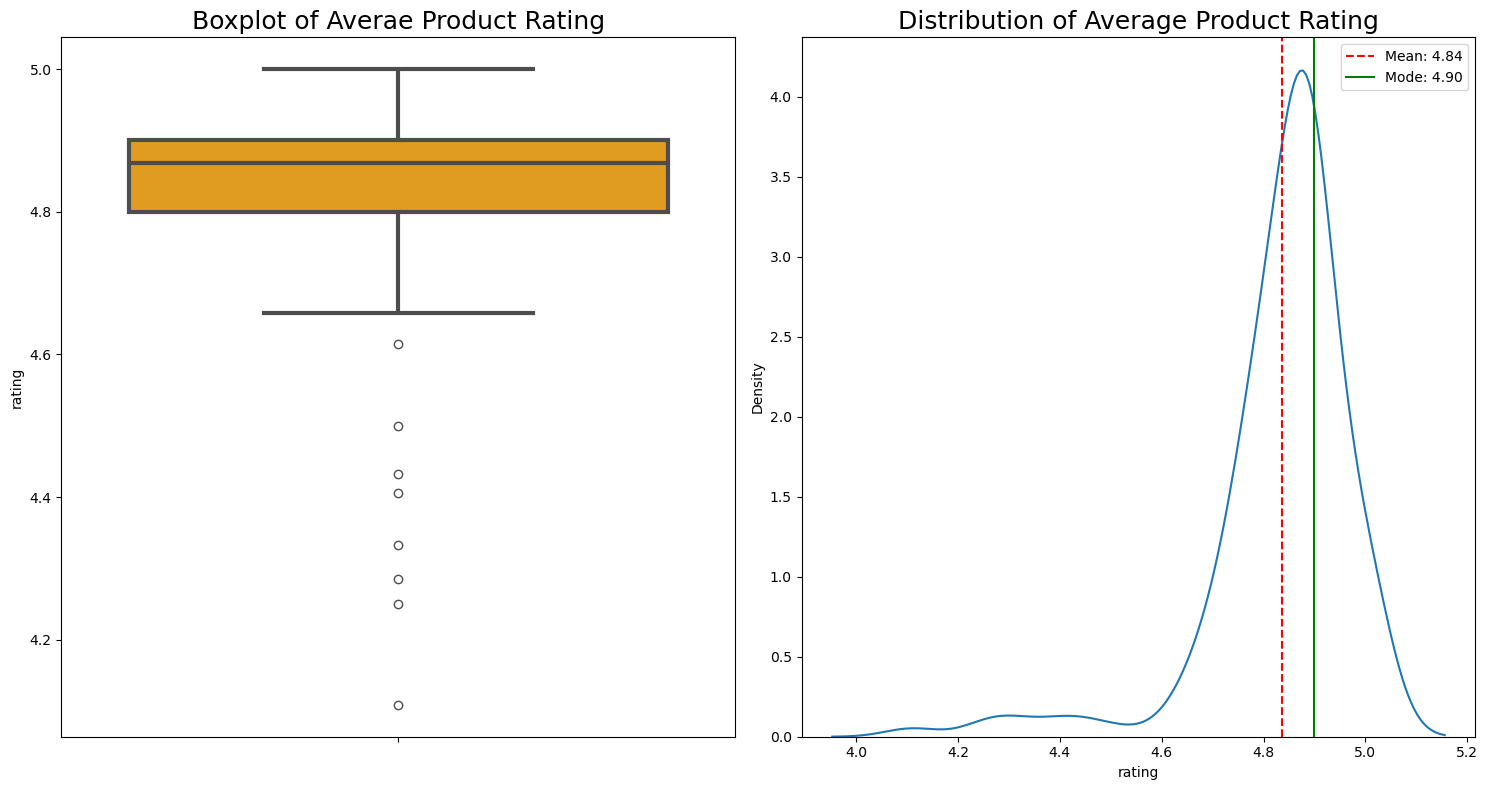

In [13]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Boxplot on the left side
sns.boxplot(y=product['rating'], color='orange', linewidth=3, ax=axes[0])
axes[0].set_title(f'Boxplot of Averae Product Rating', fontsize=18)

# KDE plot on the right side
sns.kdeplot(x=product['rating'], ax=axes[1])

# Add mean and mode lines to the KDE plot
mean_val = product['rating'].mean()
mode_val = product['rating'].mode()[0]

axes[1].axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
axes[1].axvline(mode_val, color='g', linestyle='-', label=f'Mode: {mode_val:.2f}')
axes[1].set_title(f'Distribution of Average Product Rating', fontsize=18)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**Observasi:**
- Didapati adanya nilai distribusi right-skewed, dimana average rating untuk tiap produk paling banyak di-angka 4.8 sampai 5,  dengan nilai rata-rata 4.84 dan nilai paling banyak 4.9

- Rating rata-rata yang tinggi dan penyebaran yang sempit menunjukkan bahwa produk secara umum sangat disukai oleh pelanggan.

- Konsentrasi rating di sekitar nilai tertinggi mungkin menunjukkan adanya bias dalam ulasan atau kualitas produk yang konsisten baik.

Blok kode dibawah ditujukan untuk melakukan visualisasi terhadap kolom 'category' pda dataframe product. hal ini dilakukan untuk meninjau top category product yang paling banyak

C:\Users\tohah\AppData\Local\Temp\ipykernel_3348\593379254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='category', data=product, palette='Set2', order=category_order)


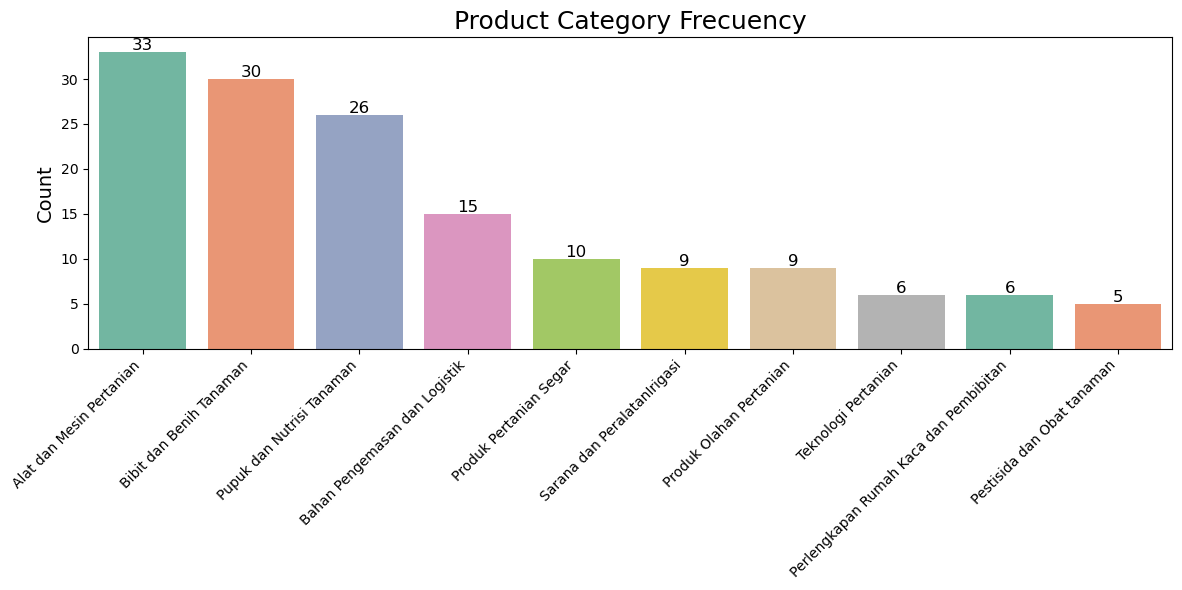

In [14]:
# Get the category counts in descending order
category_order = product['category'].value_counts().index

# Create the countplot with categories sorted by frequency
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='category', data=product, palette='Set2', order=category_order)

# Add title and labels
plt.title('Product Category Frecuency', fontsize=18)
plt.xlabel('')
plt.ylabel('Count', fontsize=14)

# Rotate the x-axis labels for better visibility (if the category names are long)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position (center of each bar)
        p.get_height() + 0.2,  # Y position (slightly above the bar)
        f'{int(p.get_height())}',  # The value to display
        ha='center',  # Center the text horizontally
        fontsize=12,  # Font size
        color='black'  # Text color
    )

# Display the plot
plt.tight_layout()
plt.show()

**Observasi:**
- Kategori "Alat dan Mesin Pertanian" adalah yang paling banyak muncul dalam dataset, dengan total 33 produk. Diikuti oleh "Bibit dan Benih Tanaman" sebanyak 30 produk dan "Pupuk dan Nutrisi Tanaman" sebanyak 26 produk.
- Distribusi menurun: Jumlah produk dalam kategori lainnya menurun secara bertahap, dengan kategori paling sedikit adalah "Pestisida dan Obat Tanaman" yang hanya memiliki 5 produk.
- Ketimpangan Frekuensi: Kategori atas seperti "Alat dan Mesin Pertanian," "Bibit dan Benih Tanaman," dan "Pupuk dan Nutrisi Tanaman" mendominasi hampir setengah dari total produk dalam dataset.
Sebaliknya, kategori dengan frekuensi rendah seperti "Pestisida dan Obat Tanaman", "Perlengkapan Rumah Kaca dan Pembibitan," dan "Teknologi Pertanian" hanya memiliki sedikit produk, menunjukkan distribusi yang tidak seimbang antar kategori.
- Observasi Berdasarkan Tren Pasar: Kebutuhan tinggi untuk kategori alat dan benih. Dominasi kategori "Alat dan Mesin Pertanian" dan "Bibit dan Benih Tanaman" mencerminkan fokus utama pada produk yang mendukung proses pertanian langsung, seperti pengolahan lahan, pembibitan, dan penanaman.
- Rendahnya produk teknologi dan pestisida: Kategori seperti "Teknologi Pertanian" dan "Pestisida dan Obat Tanaman" memiliki frekuensi rendah, yang dapat menunjukkan permintaan pasar yang lebih kecil atau kurangnya penyediaan produk-produk ini dalam dataset.


### User Reviews

blok kode dibawah ditujukan untuk melakukan visualisasi kolom 'rating' dari dataframe user_reviews. Hal ini dilakukan untuk meninjau sebaran serta frekuensi rating yang diberikan customer

C:\Users\tohah\AppData\Local\Temp\ipykernel_3348\3463329774.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes[0] = sns.countplot(x='rating', data=user_reviews, ax=axes[0], palette='Set2')


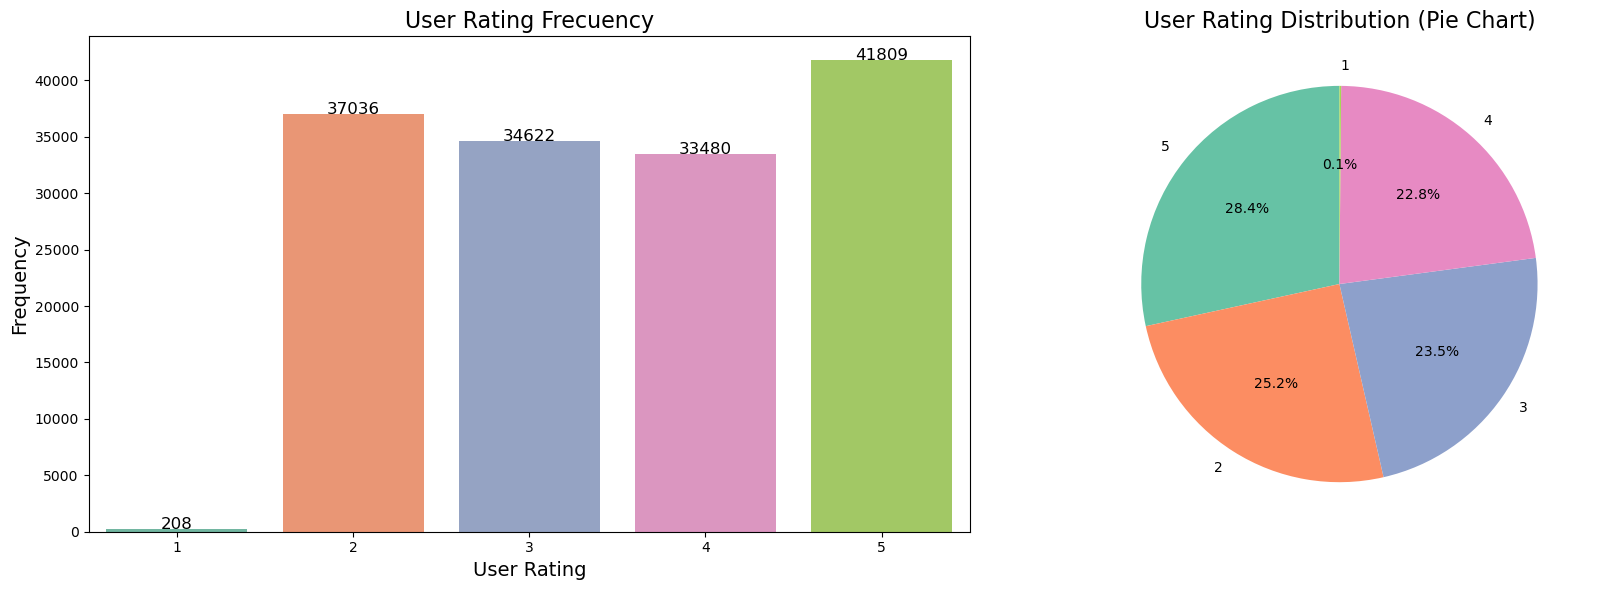

In [15]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0] = sns.countplot(x='rating', data=user_reviews, ax=axes[0], palette='Set2')
axes[0].set_title('User Rating Frecuency', fontsize=16)
axes[0].set_xlabel('User Rating', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

for p in axes[0].patches:
    axes[0].text(
        p.get_x() + p.get_width() / 2,  # X position (center of each bar)
        p.get_height() + 0.2,  # Y position (slightly above the bar)
        f'{int(p.get_height())}',  # The value to display
        ha='center',  # Center the text horizontally
        fontsize=12,  # Font size
        color='black'  # Text color
    )

# Right plot: Pie chart (showing the distribution of ratings)
rating_counts = user_reviews['rating'].value_counts()  # Count the occurrences of each rating
rating_labels = rating_counts.index  # Rating values (e.g., 1, 2, 3, 4, 5)
rating_sizes = rating_counts.values  # The count for each rating

# Plot the pie chart
axes[1].pie(rating_sizes, labels=rating_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(rating_sizes)))
axes[1].set_title('User Rating Distribution (Pie Chart)', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

**Observasi:**
- Rating paling sering: Rating 5 adalah yang paling sering diberikan, dengan total 41.809 ulasan, mencerminkan sebagian besar pengguna sangat puas dengan produk.
- Rating kedua terbanyak: Rating 2 berada di posisi kedua dengan 37.036 ulasan, menunjukkan sejumlah besar ketidakpuasan pengguna.
- Rating netral: Rating 3 berada di tengah-tengah dengan 34.622 ulasan, mencerminkan pengalaman pengguna yang biasa saja.
- Rating jarang diberikan: Rating 1 adalah yang paling sedikit diberikan, hanya 208 ulasan, menunjukkan bahwa hanya sedikit pengguna yang memberikan penilaian terendah.
- Ketimpangan Distribusi: Sebagian besar ulasan berada di rating tinggi (5) dan rendah (2), menciptakan pola distribusi yang terpolarisasi. Jumlah ulasan dengan rating netral (3) hampir sama dengan rating 2 dan sedikit lebih rendah dibandingkan rating 4.
- Rating sangat rendah jarang terjadi: Rating 1 sangat jarang diberikan dibandingkan rating lainnya, yang menunjukkan bahwa mayoritas pengguna tidak memberikan ulasan negatif ekstrim.

- Observasi Berdasarkan Kecenderungan Pengguna:
    - Mayoritas puas: Dominasi rating 5 menunjukkan bahwa pengguna cenderung puas atau sangat puas terhadap produk atau layanan yang mereka terima.
    - Peningkatan potensi kualitas: Rating 2 yang tinggi menunjukkan adanya kelompok signifikan pengguna yang tidak puas. Ini dapat menjadi indikasi untuk memperbaiki produk atau layanan.
    - Kurangnya ulasan ekstrem negatif: Jumlah rating 1 yang sangat kecil menunjukkan bahwa kasus ketidakpuasan ekstrim jarang terjadi, yang merupakan hal positif.

Blok kode dibawah ditujukan untuk melakukn visualisasi terhadap kolom 'category' pada dataframe user_revies. hal ini dilakukan untuk meninjau produk mana yang paling banyak terjual dan mendapatkan review

C:\Users\tohah\AppData\Local\Temp\ipykernel_3348\1040269770.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='category', data=user_reviews, palette='Set2', order=category_order)


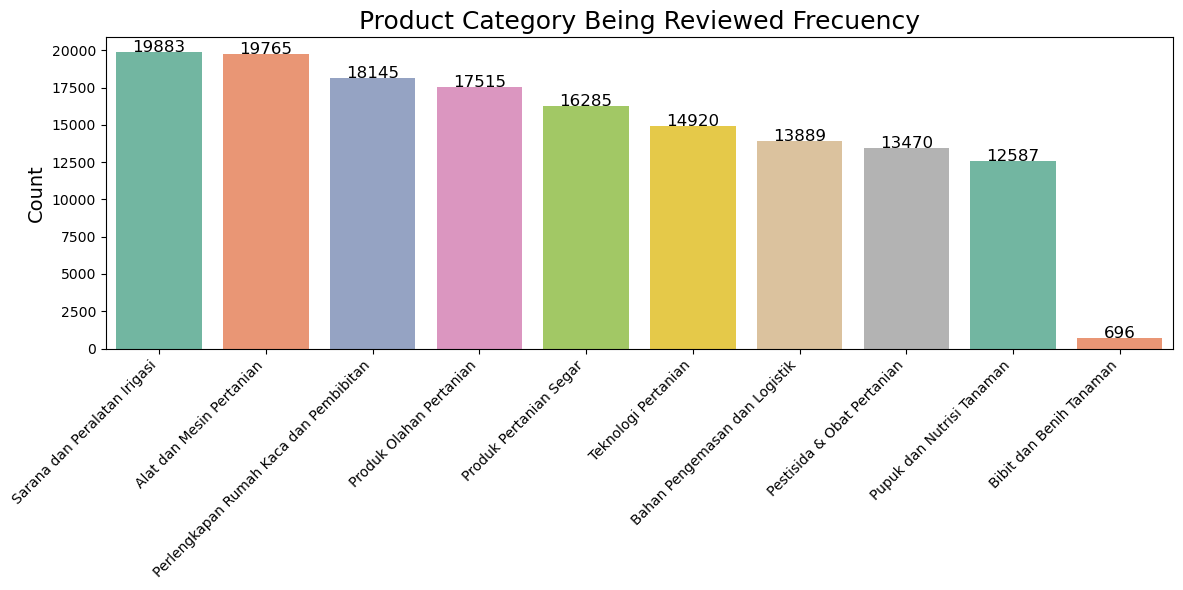

In [16]:
# Get the category counts in descending order
category_order = user_reviews['category'].value_counts().index

# Create the countplot with categories sorted by frequency
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='category', data=user_reviews, palette='Set2', order=category_order)

# Add title and labels
plt.title('Product Category Being Reviewed Frecuency', fontsize=18)
plt.xlabel('')
plt.ylabel('Count', fontsize=14)

# Rotate the x-axis labels for better visibility (if the category names are long)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position (center of each bar)
        p.get_height() + 0.2,  # Y position (slightly above the bar)
        f'{int(p.get_height())}',  # The value to display
        ha='center',  # Center the text horizontally
        fontsize=12,  # Font size
        color='black'  # Text color
    )

# Display the plot
plt.tight_layout()
plt.show()

**Observasi:**
- Kategori paling populer: Sarana dan Peralatan Irigasi adalah kategori yang paling sering diulas/terjual, dengan total 19.883 ulasan. Hal ini menunjukkan tingginya permintaan terhadap produk-produk terkait irigasi. Alat dan Mesin Pertanian berada di peringkat kedua dengan 19.765 ulasan. Perlengkapan Rumah Kaca dan Pembibitan berada di posisi ketiga dengan 18.145 ulasan. Kedua kategori ini menunjukkan popularitas produk-produk yang mendukung kegiatan pertanian secara langsung.
- Kategori dengan Jumlah Ulasan Sedang: 'Produk Olahan Pertanian', Kategori ini memiliki 17.515 ulasan, mencerminkan permintaan yang cukup signifikan untuk produk-produk yang telah diolah. 'Produk Pertanian Segar': Dengan 16.285 ulasan, kategori ini menunjukkan bahwa konsumen juga tertarik pada hasil pertanian yang segar. 'Teknologi Pertanian': Memiliki 14.920 ulasan, menandakan minat terhadap inovasi teknologi dalam bidang pertanian.
- Kategori dengan Jumlah Ulasan Rendah, 'Bibit dan Benih Tanaman': Dengan hanya 696 ulasan, kategori ini menjadi yang paling sedikit diulas. Hal ini menunjukkan permintaan yang relatif rendah dibandingkan kategori lain. 'Pupuk dan Nutrisi Tanaman': Kategori ini memiliki 12.587 ulasan, menempatkannya dalam kelompok dengan permintaan sedang.
- Ketimpangan Distribusi: Terdapat perbedaan besar antara kategori dengan jumlah ulasan tertinggi (Sarana dan Peralatan Irigasi) dan terendah (Bibit dan Benih Tanaman). Hal ini mencerminkan perbedaan fokus konsumen terhadap jenis produk yang dibutuhkan atau diminati.

## Bivariate Analysis

Blok kode dibawah ditujukan untuk melakukan visualisasi terhadap frekuensi review yang diterima oleh top 5 category product paling banyak terjual

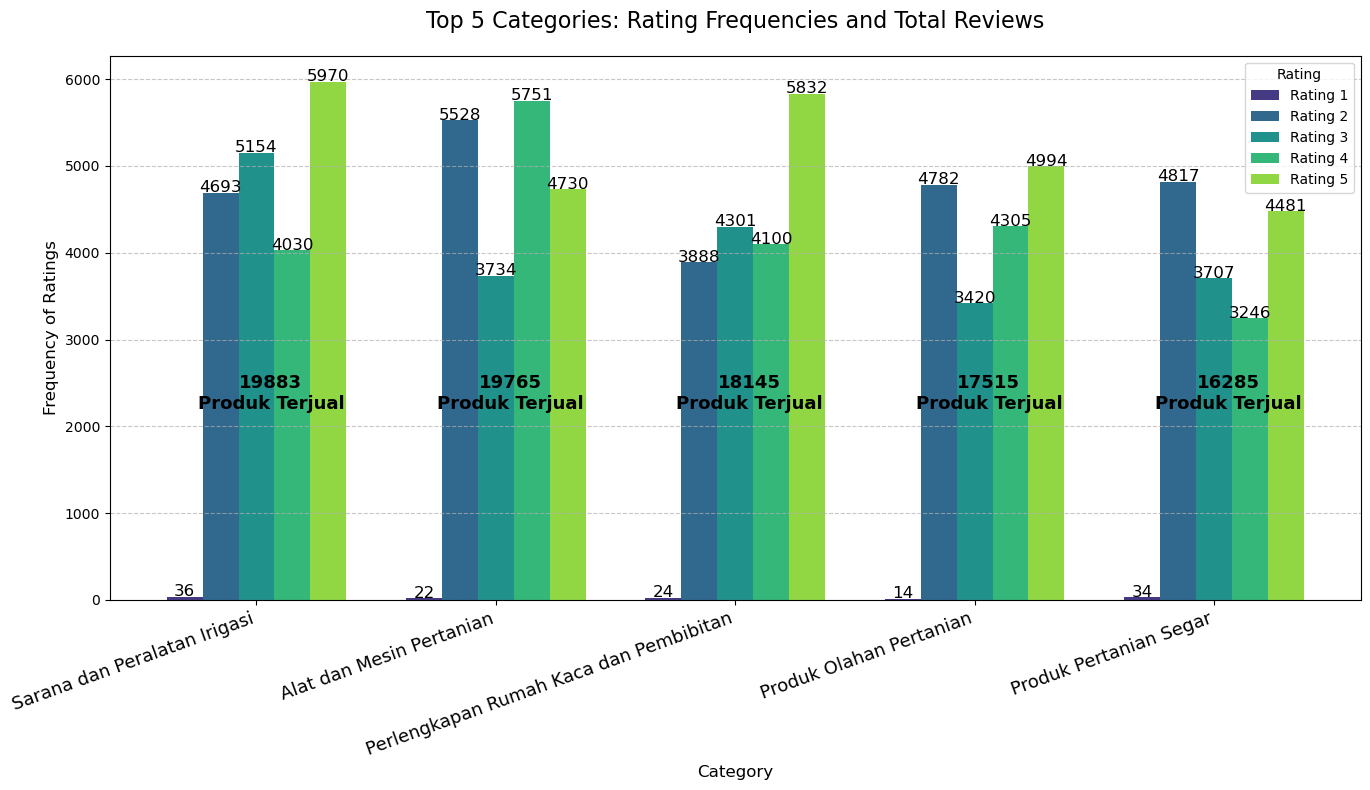

In [17]:
category_review_counts = user_reviews.groupby('category').size().reset_index(name='review_count')
top_5_categories = category_review_counts.nlargest(5, 'review_count')['category']

# Filter the DataFrame for only these top 5 categories
top_5_data = user_reviews[user_reviews['category'].isin(top_5_categories)]

# Group by category and rating to count rating frequencies
rating_frequencies = top_5_data.groupby(['category', 'rating']).size().reset_index(name='count')

# Pivot the DataFrame for side-by-side bar chart
rating_frequencies_pivot = rating_frequencies.pivot(index='category', columns='rating', values='count').fillna(0)

# Add a column for total reviews for sorting
rating_frequencies_pivot['total_reviews'] = rating_frequencies_pivot.sum(axis=1)

# Sort categories by total reviews (descending)
rating_frequencies_pivot = rating_frequencies_pivot.sort_values(by='total_reviews', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Create side-by-side bar chart
bar_width = 0.15
categories = rating_frequencies_pivot.index
x = range(len(categories))

colors = sns.color_palette('viridis', n_colors=5)

# Loop through each rating (1-5) to plot
for i, rating in enumerate(rating_frequencies_pivot.columns[:-1]):
    ax.bar(
        [pos + i * bar_width for pos in x],
        rating_frequencies_pivot[rating],
        bar_width,
        label=f'Rating {rating}',
        color=colors[i]
    )
    # Add text above bars
    for pos, val in enumerate(rating_frequencies_pivot[rating]):
        if val > 0:
            ax.text(pos + i * bar_width, val + 5, int(val), ha='center', fontsize=12)

# Add total reviews in the middle of each category
for pos, total in enumerate(rating_frequencies_pivot['total_reviews']):
    ax.text(pos + 2.4 * bar_width, 2200, f"{int(total)}\nProduk Terjual", ha='center', fontsize=13, fontweight='bold')

# Customize chart
ax.set_xticks([pos + 2 * bar_width for pos in x])
ax.set_xticklabels(categories, rotation=20, fontsize=13, ha='right')
ax.set_title('Top 5 Categories: Rating Frequencies and Total Reviews', fontsize=16, pad=20)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Frequency of Ratings', fontsize=12)
ax.legend(title='Rating', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show
plt.tight_layout()
plt.show()

**Observasi:**

**1. Alat dan Mesin Pertanian:**
- **Rating tertinggi (4 dan 5):**
  - Rating **4** dan **5** mendominasi kategori ini, masing-masing dengan **5.751** dan **4.730** ulasan, menunjukkan tingkat kepuasan yang cukup tinggi di antara konsumen.
- **Rating sedang (3):**
  - Rating **3** memiliki **3.734** ulasan, yang mencerminkan adanya konsumen dengan pengalaman netral.
- **Rating rendah (1 dan 2):**
  - Rating **2** mencapai **5.528**, cukup signifikan, sedangkan **rating 1** hanya ada **22** ulasan.


**2. Perlengkapan Rumah Kaca dan Pembibitan:**
- **Rating tertinggi (5):**
  - Rating **5** menjadi yang paling dominan, dengan **5.832** ulasan, mencerminkan produk ini sangat disukai konsumen.
- **Rating sedang (3 dan 4):**
  - **4.301** ulasan untuk rating **3** dan **4.100** ulasan untuk rating **4**, menunjukkan bahwa sebagian konsumen merasa puas atau netral.
- **Rating rendah (1 dan 2):**
  - Rating **2** memiliki **3.888** ulasan, sedangkan rating **1** hanya **24**, menunjukkan tingkat ketidakpuasan yang rendah.


**3. Produk Olahan Pertanian:**
- **Rating tertinggi (5):**
  - Rating **5** memiliki **4.994** ulasan, menjadi yang paling banyak di kategori ini.
- **Rating sedang (3 dan 4):**
  - Rating **4** mencatat **4.305** ulasan, sementara rating **3** memiliki **3.420** ulasan.
- **Rating rendah (1 dan 2):**
  - Rating **2** cukup tinggi dengan **4.782** ulasan, tetapi rating **1** sangat sedikit, hanya **14** ulasan.

**4. Produk Pertanian Segar:**
- **Rating tertinggi (5):**
  - Dengan **4.481** ulasan untuk rating **5**, kategori ini menunjukkan tingkat kepuasan yang tinggi di antara konsumen.
- **Rating sedang (3 dan 4):**
  - Rating **4** memiliki **3.246** ulasan, sementara rating **3** ada **3.707** ulasan.
- **Rating rendah (1 dan 2):**
  - Rating **2** tercatat sebanyak **4.817**, sedangkan rating **1** hanya **34**.

**5. Sarana dan Peralatan Irigasi:**
- **Rating tertinggi (5):**
  - Rating **5** mendominasi kategori ini dengan **5.970** ulasan, menunjukkan bahwa produk ini sangat dihargai.
- **Rating sedang (3 dan 4):**
  - Rating **3** memiliki **5.154** ulasan, sementara rating **4** mencatat **4.030** ulasan.
- **Rating rendah (1 dan 2):**
  - Rating **2** mencapai **4.693**, sedangkan rating **1** adalah yang paling sedikit, hanya **36** ulasan.


- **Kesimpulan Umum:**
> Dari kelima kategori produk, sebagian besar ulasan menunjukkan rating tinggi (**4 dan 5**), yang mencerminkan tingkat kepuasan konsumen yang baik secara keseluruhan. Namun, terdapat pula jumlah ulasan yang signifikan dengan rating **2**, terutama pada kategori **Alat dan Mesin Pertanian**, **Produk Olahan Pertanian**, dan **Sarana dan Peralatan Irigasi**, yang mengindikasikan bahwa ada ruang untuk perbaikan kualitas produk atau layanan pada kategori-kategori tersebut.

# Data Preprocessing

## Handle Null value

Blok kode dibawah ditujukan untuk melihat nilai null value yang munkin terdapat pada dataframe product

In [18]:
product.isna().sum()

productname           0
productdescription    1
rating                0
sellerid              0
price                 0
stock                 0
image                 0
category              0
dtype: int64

Didapati bahwa terdapat satu null values pada kolom 'productdescription', yang ditampilkan dengan blok kode berikut

In [19]:
product[product['productdescription'].isna()]

,productname,productdescription,rating,sellerid,price,stock,image,category
59,pot tanaman grace ukuran 40 cm kuping warna hi...,NaN,4.9,Mahmud Storee,"Rp17,000.00",225.0,dc217d74-20d2-48c5-b350-28360078aff4.jpg.jpg,Perlengkapan Rumah Kaca dan Pembibitan


Blok kode dibawah ditujukan untuk meninjau produk yang dijual oleh toko Mahmud Storee untuk meninjau lebih lanjut produk yang memiliki nilai null

In [20]:
product[product['sellerid']=='Mahmud Storee']

,productname,productdescription,rating,sellerid,price,stock,image,category
59,pot tanaman grace ukuran 40 cm kuping warna hi...,NaN,4.9,Mahmud Storee,"Rp17,000.00",225.0,dc217d74-20d2-48c5-b350-28360078aff4.jpg.jpg,Perlengkapan Rumah Kaca dan Pembibitan


Karena hanya terdapat satu product dengan nilai null value, sehingga 'productdescription' dengan nilai null value tersebut diisi dengan string deskripsi produk secara sederhana saja, tanpa perlu dihapus karena untuk proyek kali ini fitur 'productdescription' belum digunakan, akan tetapi munkin digunakan untuk pengembangan projek kedepannya.

In [21]:
product['productdescription'] = product['productdescription'].fillna('pot tanaman')

Blok kode dibawah ditujukan untuk melihat nilai null pada dataframe product setelah dilakukan handling null values, didapati bahwa tidak ditemukan kembali nilai null

In [22]:
product.isna().sum()

productname           0
productdescription    0
rating                0
sellerid              0
price                 0
stock                 0
image                 0
category              0
dtype: int64

Blok kode dibawah ditujukan untuk meninjau nilai null value pada dataframe user_reviews, didapati bahwa yidak ditemukannya nilai null

In [23]:
user_reviews.isna().sum()

productname    0
rating         0
user_id        0
category       0
dtype: int64

## Handle Duplicate

Blok kode dibawah ditujukan untuk melihat nilai duplikat yang terdapat pada dataframe product. **Ditemukan 4 data duplikat**

In [24]:
product.duplicated().sum()

4

Blok kode dibawah ditujukan untuk meninjau baris duplikat pada dataframe product

In [25]:
product[product.duplicated(keep=False)]

,productname,productdescription,rating,sellerid,price,stock,image,category
75,Benih Seribuan - Paket 5 Macam Bibit Buah Mera...,ðð¢ðð¢ð­ ðð®ðð¡ ðð®...,4.730871,Benih Seribuan Official Store,"Rp145.000,00",12,sg-11134201-7rdy6-lybpir2hgmpy9c.jpg.jpg,Bibit dan Benih Tanaman
77,Benih Seribuan - Paket 15 Macam Bibit Sayur Hi...,ðð¢ðð¢ð­ ððð²ð®ð«ðð...,4.880998,Benih Seribuan Official Store,"Rp200.000,00",130297,id-11134207-7r98v-m02zec9s3ca748.jpg.jpg,Bibit dan Benih Tanaman
82,Benih Seribuan - Paket 5 Macam Bibit Buah Mera...,ðð¢ðð¢ð­ ðð®ðð¡ ðð®...,4.730871,Benih Seribuan Official Store,"Rp145.000,00",12,sg-11134201-7rdy6-lybpir2hgmpy9c.jpg.jpg,Bibit dan Benih Tanaman
86,Benih Seribuan - Paket 15 Macam Bibit Sayur Hi...,ðð¢ðð¢ð­ ððð²ð®ð«ðð...,4.880998,Benih Seribuan Official Store,"Rp200.000,00",130297,id-11134207-7r98v-m02zec9s3ca748.jpg.jpg,Bibit dan Benih Tanaman
106,500ml Pupuk Bunga Super By Blooming Fertilizer,Pupuk Bunga Spray By Blooming Fertilizer \n\nP...,4.873616,Panda Farm,"Rp320.000,00",938,fc7ea2138b09a7933ebc4d8442250245.jpg.jpg,Pupuk dan Nutrisi Tanaman
108,500ml Pupuk Bunga Super By Blooming Fertilizer,Pupuk Bunga Spray By Blooming Fertilizer \n\nP...,4.873616,Panda Farm,"Rp320.000,00",938,fc7ea2138b09a7933ebc4d8442250245.jpg.jpg,Pupuk dan Nutrisi Tanaman
121,Cangkul Pacul Ayam +gagang cangkul kayu terpas...,BISA REQUEST TANPA DIPASANG\npaket Pacul cap a...,4.773585,muliamaju88,"Rp378.000,00",2655,32549e630d698f5da984073c7d57a089.jpg.jpg,Alat dan Mesin Pertanian
122,Cangkul Pacul Ayam +gagang cangkul kayu terpas...,BISA REQUEST TANPA DIPASANG\npaket Pacul cap a...,4.773585,muliamaju88,"Rp378.000,00",2655,32549e630d698f5da984073c7d57a089.jpg.jpg,Alat dan Mesin Pertanian


Blok dibawah ditujukan untuk handling baris duplikat pada dataframe product dengan melakukan drop duplicate

In [26]:
product = product.drop_duplicates()

Blok kode dibawah ditujukan untuk meninjaau kembali data duplikat pada dataframe product setelah dilakukan handling duplicate. **Tidak ditemukan data duplicate**

In [27]:
product.duplicated().sum()

0

Blok kode dibawah ditujukan untuk meninjau nilai duplikat pada dataframe user_reviews. Ditemukan 1843 nilai duplikat

In [28]:
user_reviews.duplicated().sum()

1843

Blok kode dibawah ditujukan untuk meninjau baris data duplikat pada dataframe user_reviews. Didapati bahwa data duplikat munkin terjadi karena setiap user telah melakukan pembelian produk secara berulang, karena tidak adanya pencatatan waktu, maka nilai duplikat dibiarkan tanpa dilakukan handling apapun

In [29]:
user_reviews[user_reviews.duplicated(keep=False)]

,productname,rating,user_id,category
0,"herbisida obat pembasmi rumput liar, gulma, al...",5,Bambang,Pestisida & Obat Pertanian
1,"herbisida obat pembasmi rumput liar, gulma, al...",5,Dimas,Pestisida & Obat Pertanian
2,"herbisida obat pembasmi rumput liar, gulma, al...",5,Bambang,Pestisida & Obat Pertanian
4,"herbisida obat pembasmi rumput liar, gulma, al...",5,Dendy,Pestisida & Obat Pertanian
7,"herbisida obat pembasmi rumput liar, gulma, al...",5,Muhammad,Pestisida & Obat Pertanian
...,...,...,...,...
97722,"herbisida obat pembasmi rumput liar, gulma, al...",5,Chandra,Pestisida & Obat Pertanian
100346,"DESTHIN obat hama tanaman, ulat, kutu putih, h...",5,Mustofa,Pestisida & Obat Pertanian
127960,"INFARM - Paket Pupuk Booster Magic , POC Buah,...",5,denylailatul88,Pupuk dan Nutrisi Tanaman
127978,"INFARM - Paket Pupuk Booster Magic , POC Buah,...",5,mayacrochet06,Pupuk dan Nutrisi Tanaman


## Handle Miss-spelling

Blok kode dibawah ditujukan untuk meninjau category yang ada pada dataframe product

In [30]:
product.category.unique()

array(['Pestisida dan Obat tanaman', 'Produk Pertanian Segar',
       'Sarana dan PeralatanIrigasi', 'Bahan Pengemasan dan Logistik',
       'Teknologi Pertanian', 'Produk Olahan Pertanian',
       'Perlengkapan Rumah Kaca dan Pembibitan',
       'Bibit dan Benih Tanaman', 'Pupuk dan Nutrisi Tanaman',
       'Alat dan Mesin Pertanian'], dtype=object)

Blok kode dibawah ditujukan untuk meninjau category yang ada pada dataframe user_reviews

In [31]:
user_reviews.category.unique()

array(['Pestisida & Obat Pertanian', 'Produk Pertanian Segar',
       'Sarana dan Peralatan Irigasi', 'Produk Olahan Pertanian',
       'Teknologi Pertanian', 'Perlengkapan Rumah Kaca dan Pembibitan',
       'Bahan Pengemasan dan Logistik', 'Pupuk dan Nutrisi Tanaman',
       'Alat dan Mesin Pertanian', 'Bibit dan Benih Tanaman'],
      dtype=object)

Didapati bahwa ada satu jenis kategori yang berbeda yaitu, untuk kategori "Pestisida dan Obat tanaman" pada dataframe product terhadap kategori 'Pestisida & Obat Pertanian" pada dataframe user_reviews. maka dilakukan perubahan pada dataframe user_reviews dengan penyesuaian menggunakan dataframe product

In [32]:
# Mengantikan 'Pestisida & Obat Pertanian' dengan 'Pestisida dan Obat tanaman' in the 'category' column
user_reviews['category'] = user_reviews['category'].replace('Pestisida & Obat Pertanian', 'Pestisida dan Obat tanaman')

# Model Development

## Content-Based Filtering

**Melakukan seleksi fitur untuk Mengembangkan sistem rekomendasi dengan Content-Based Filtering**

In [33]:
product.sample(3)

,productname,productdescription,rating,sellerid,price,stock,image,category
118,Garuk Untuk Membuat atau Membersihkan Piringan...,Garuk untuk Membuat atau Membersihkan Piringan...,4.820513,Nomor.1,"Rp800.000,00",82,5a47c267f4e2e7e13c6da5d798139fd8.jpg.jpg,Alat dan Mesin Pertanian
67,Benih Seribuan - Paket Komplit 50 Macam Bibit ...,ððð¤ðð­ ððððð ð...,4.824551,Benih Seribuan Official Store,"Rp550.000,00",98988,id-11134201-7r990-ln66wog5v21ze9.jpg.jpg,Bibit dan Benih Tanaman
83,Benih Seribuan - Paket 5 Macam Bibit Aneka Saw...,ððð¤ðð­ ððð¦ðð­ ð...,4.859908,Benih Seribuan Official Store,"Rp60.000,00",139908,id-11134201-7r98v-ln66wk664ekhb3.jpg.jpg,Bibit dan Benih Tanaman


Blok kode dibawah ditujukan untuk menyalin data berupa kolom 'productname' dan 'category'. kedua fitur ini dipilih karena pada proyek ini sistem rekomendasi produk dilakukan berdasarkan kategori produk

In [34]:
cbf_product = product[['productname', 'category']]

Blok kode dibawah ditujukan untuk melakukan **Stop Word Removal** pada kolom kategori untuk selanjutnya dilakukan vektorisasi

In [35]:
# menghilangkan 'dan' dari setiap category pada kolom 'category'
cbf_product['category'] = cbf_product['category'].str.replace(r'\bdan\b', '', regex=True)

# Check the updated categories
cbf_product['category'].value_counts()

C:\Users\tohah\AppData\Local\Temp\ipykernel_3348\3650975886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbf_product['category'] = cbf_product['category'].str.replace(r'\bdan\b', '', regex=True)


category
Alat  Mesin Pertanian                  32
Bibit  Benih Tanaman                   28
Pupuk  Nutrisi Tanaman                 25
Bahan Pengemasan  Logistik             15
Produk Pertanian Segar                 10
Sarana  PeralatanIrigasi                9
Produk Olahan Pertanian                 9
Teknologi Pertanian                     6
Perlengkapan Rumah Kaca  Pembibitan     6
Pestisida  Obat tanaman                 5
Name: count, dtype: int64

Blok kode dibawah ditujukan untuk melkukan vektorisasi pada kolom 'category' yang nantinya dijadikan dasar untuk sistem rekomendasi

In [36]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data category
tf.fit(cbf_product['category']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out() 

array(['alat', 'bahan', 'benih', 'bibit', 'kaca', 'logistik', 'mesin',
       'nutrisi', 'obat', 'olahan', 'pembibitan', 'pengemasan',
       'peralatanirigasi', 'perlengkapan', 'pertanian', 'pestisida',
       'produk', 'pupuk', 'rumah', 'sarana', 'segar', 'tanaman',
       'teknologi'], dtype=object)

Blok kode dibawah ditujukan untuk melakukan fit vectorizer terhadap data lalu ditransformasikan ke bentuk matrix, dan kemudian ditinjau dimensi dari hasil akhir transformasi yang dilakukan

In [37]:
tfidf_matrix = tf.fit_transform(cbf_product['category']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(145, 23)

Blok kode dibawah ditujukan untuk mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()

In [38]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.3060946 ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.3060946 ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.3060946 ,
         0.        ],
        ...,
        [0.62042136, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.62042136, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.62042136, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Blok kode dibawah ini ditujukan untuk membuat dataframe guna melihat tf-idf matrix
- Kolom diisi dengan kategori produk
- Baris diisi dengan nama produk

In [39]:
matrix_tfidf = pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=cbf_product.productname
).sample(22, axis=1).sample(10, axis=0)
matrix_tfidf

,logistik,kaca,teknologi,pertanian,tanaman,pengemasan,pembibitan,bahan,rumah,nutrisi,...,produk,pupuk,olahan,perlengkapan,sarana,alat,segar,pestisida,peralatanirigasi,obat
productname,,,,,,,,,,,,,,,,,,,,,
DXP LONSUM UNGGUL PP LONDON SUMATERA BIBIT UNGGUL BERKUALITAS,0.00000,0.0,0.0,0.000000,0.457956,0.00000,0.0,0.00000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000
INFARM - Paket Nutrisi Organik POC Sayur 500ml POC Buah 500ml,0.00000,0.0,0.0,0.000000,0.443273,0.00000,0.0,0.00000,0.0,0.633841,...,0.000000,0.633841,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000
COD - ALAT KASTRASI SAWIT / DODOS KASTRASI SAWIT,0.00000,0.0,0.0,0.479744,0.000000,0.00000,0.0,0.00000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.620421,0.00000,0.000000,0.0,0.000000
Benih Seribuan - Paket 5 Macam Bibit Tomat Sayuran Unggul,0.00000,0.0,0.0,0.000000,0.457956,0.00000,0.0,0.00000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000
ISKU Pressure Sprayer 1L/2L Botol Semprotan Tanaman Manual /alat semprot tanaman 2L Botol Semprot,0.00000,0.0,0.0,0.479744,0.000000,0.00000,0.0,0.00000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.620421,0.00000,0.000000,0.0,0.000000
Pupuk Organik Cair (POC) - Untuk Segala Jenis Tanaman - Organic Liquid Fertilizer - Pelebat Buah,0.00000,0.0,0.0,0.000000,0.443273,0.00000,0.0,0.00000,0.0,0.633841,...,0.000000,0.633841,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000
"herbisida obat pembasmi rumput liar, gulma, alang2 - gross",0.00000,0.0,0.0,0.000000,0.306095,0.00000,0.0,0.00000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.673166,0.0,0.673166
Benih Seribuan - Paket 5 Macam Bibit Aneka Sawi Sawian Unggul,0.00000,0.0,0.0,0.000000,0.457956,0.00000,0.0,0.00000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000
KARDUS PACKING 20x10x8 cm / BOX KARTON CORUGATED B-FLUTE / PACKING,0.57735,0.0,0.0,0.000000,0.000000,0.57735,0.0,0.57735,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000


Blok kode dibawah ditujukan untuk menghitung nilai cosine similarity berdasarkan matrix tf-idf

In [40]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

Blok kode dibawah ditujukan untuk membuat dataframe baru yang berisi hasil pemrosesan hitung cosine similarity, yang nantinya akan digunakan untuk membuat rekomendasi

In [41]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=cbf_product['productname'], columns=cbf_product['productname'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap product
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (145, 145)


productname,Connector Offtake Selang Drip,INFARM - Paket Pupuk Pelebat Buah Organik POC Buah dan Fruit Expert,Benih Seribuan - Paket 4 Macam Benih Paprika Mixed Sayuran Unggul,BUBBLE WRAP UNTUK TAMBAHAN PACKING,Cangkul Pacul Ayam +gagang cangkul kayu terpasang siap pakai
productname,,,,,
ALAT KASTRASI SAWIT.,0.0,0.000,0.000,0.0,1.000000
Benih Seribuan - Paket 15 Macam Bibit Sayuran Daun 30 Hari Panen,0.0,0.203,1.000,0.0,0.000000
"Dop 3 in PVC / Dop 3"" / Tutup Pipa",1.0,0.000,0.000,0.0,0.000000
VIT-O KEMASAN 5000ml/5 Liter pupuk cair organik segala tanaman teknologi jepang,0.0,1.000,0.203,0.0,0.000000
Sprayer Tanaman DRAGON HNL HL H&L 2Liter / Semprotan Hama 2L / Jet Pump Preassure Sprayer 2 Liter DBS2,0.0,0.000,0.000,0.0,1.000000
100gr Jahe Kering / Dried Ginger/ Rempah / JSR 100% PREMIUM QUALITY,0.0,0.000,0.000,0.0,0.182767
PUPUK ORGANIK CAIR POC SAYURAN DAUN 500ML,0.0,1.000,0.203,0.0,0.000000
SELANG SPIRAL 2 IN SELANG SEDOT SELANG HISAP 2 INCH POMPA ALKON,0.0,0.000,0.000,0.0,1.000000
TDS Meter 3 Alat Ukur Hidroponik Air Aquarium ppm nutrisi Kolam TDS-3,0.0,0.000,0.000,0.0,0.206298


Blok kode dibawah ditujukan untuk menghitung metrik evaluasi terhadap hasil perhitungan cosine similarity untuk meninjau ke-akuratan rekomendasi yang dibuat

In [42]:
# Placeholder for ground truth similarity
ground_truth_sim = pd.DataFrame(0, index=cosine_sim_df.index, columns=cosine_sim_df.columns)

# Populate ground truth based on category
for product1 in cbf_product['productname']:
    for product2 in cbf_product['productname']:
        if cbf_product.loc[cbf_product['productname'] == product1, 'category'].values[0] == \
           cbf_product.loc[cbf_product['productname'] == product2, 'category'].values[0]:
            ground_truth_sim.loc[product1, product2] = 1  # Same category -> Perfect similarity

# Flatten matrices for comparison
predicted = cosine_sim_df.values.flatten()
ground_truth = ground_truth_sim.values.flatten()


mse = mean_squared_error(ground_truth, predicted)
rmse = np.sqrt(mean_squared_error(ground_truth, predicted))
mae = mean_absolute_error(ground_truth, predicted)

print(f"Mean Absolut Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolut Error (MAE): 0.03721960591076589
Mean Squared Error (MSE): 0.008243001312750173
Root Mean Squared Error (RMSE): 0.09079097594337321


Blok kode dibawah ditujukan untuk membuat fungsi yang akan menghasilkan top-n produk rekomendasi berdasarkan  nama produk yang diingin kan

In [43]:
def product_recommendations(nama_produk, similarity_data=cosine_sim_df, items=cbf_product[['productname', 'category']], top=5):
    """
    Rekomendasi Produk berdasarkan kemiripan dataframe, termasuk skor kemiripan.
 
    Parameter:
    ---
    nama_produk : tipe data string (str)
                Nama Produk (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan produk sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    top : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
    # Mengambil data similarity untuk produk yang diberikan
    sim_scores = similarity_data.loc[nama_produk]
    
    # Mengambil produk-produk dengan similarity terbesar
    # Sort the similarity scores in descending order and exclude the input product itself
    sorted_sim_scores = sim_scores.sort_values(ascending=False)
    
    # Exclude the input product itself (remove it from the recommendations)
    sorted_sim_scores = sorted_sim_scores.drop(nama_produk, errors='ignore')
    
    # Select the top N recommendations
    top_recommendations = sorted_sim_scores.head(top)
    
    # Merge the recommendations with the items DataFrame to get additional details (e.g., category)
    recommendations = top_recommendations.to_frame(name="Similarity Score").merge(
        items, left_index=True, right_on='productname', how='left'
    )
    
    # Reset the index of the resulting DataFrame
    recommendations = recommendations.reset_index(drop=True)
    
    print(f"Top {top} Rekomendasi Produk dengan Skor Kemiripan:")
    return recommendations

Blok kode dibawah ditujukan untuk melihat nama salah satu produk yang tersedia. hal ini dilakukan untuk mengambil nama produk tersebut dan nantinya akan dicoba untuk dilihat rekomendasi yang bersesuaian dengan produk tersebut

In [44]:
cbf_product.productname[23]

'Booster Pump Waterplus BR 220 DPA Mesin Pendorong Air Otomatis'

blok kode dibawah ditujukan untuk melihat baris data nama produk yang akan dipilih

In [45]:
cbf_product[cbf_product.productname.eq('Booster Pump Waterplus BR 220 DPA Mesin Pendorong Air Otomatis')]

,productname,category
23,Booster Pump Waterplus BR 220 DPA Mesin Pendor...,Sarana PeralatanIrigasi


Blok kode dibawah ditujukan untuk mendapatkan rekomendasi berdasarkan produk 'Booster Pump Waterplus BR 220 DPA Mesin Pendorong Air Otomatis' (dengan nilai top= default yakni top 5 produk rekomendasi)

In [46]:
# Mendapatkan rekomendasi produk yang mirip
product_recommendations('Booster Pump Waterplus BR 220 DPA Mesin Pendorong Air Otomatis')

Top 5 Rekomendasi Produk dengan Skor Kemiripan:


,Similarity Score,productname,category
0,1.0,"Dop 3 in PVC / Dop 3"" / Tutup Pipa",Sarana PeralatanIrigasi
1,1.0,Connector Offtake Selang Drip,Sarana PeralatanIrigasi
2,1.0,DRIP TETES BOTOL Water Cone Drip IRIGASI TETES...,Sarana PeralatanIrigasi
3,1.0,Irigasi Tetes otomatis / Drip Tetes Sistem Ala...,Sarana PeralatanIrigasi
4,1.0,MOLLAR PP25W Pompa Air DC 12 Volt Push Pump 12...,Sarana PeralatanIrigasi


Blok kode dibawah ditujukan untuk mendapatkan rekomendasi berdasarkan produk 'Booster Pump Waterplus BR 220 DPA Mesin Pendorong Air Otomatis' (dengan nilai top= default yakni top 7 produk rekomendasi)

In [47]:
# Mendapatkan rekomendasi produk yang mirip
product_recommendations('Booster Pump Waterplus BR 220 DPA Mesin Pendorong Air Otomatis', top=7)

Top 7 Rekomendasi Produk dengan Skor Kemiripan:


,Similarity Score,productname,category
0,1.0,"Dop 3 in PVC / Dop 3"" / Tutup Pipa",Sarana PeralatanIrigasi
1,1.0,Connector Offtake Selang Drip,Sarana PeralatanIrigasi
2,1.0,DRIP TETES BOTOL Water Cone Drip IRIGASI TETES...,Sarana PeralatanIrigasi
3,1.0,Irigasi Tetes otomatis / Drip Tetes Sistem Ala...,Sarana PeralatanIrigasi
4,1.0,MOLLAR PP25W Pompa Air DC 12 Volt Push Pump 12...,Sarana PeralatanIrigasi
5,1.0,SELANG AIR ANTI LUMUT CUCI MOBIL / SELANG AIR ...,Sarana PeralatanIrigasi
6,1.0,SELANG AIR PERMETER / SELANG ANTI LUMUT 1/2 5/...,Sarana PeralatanIrigasi


Blok kode dibawah ditujukan untuk mendapatkan rekomendasi berdasarkan produk '100ml Pestisida Organik Neem Oil /Minyak Mimba dari Biosfer Organik' (dengan nilai top= default yakni top 5 produk rekomendasi)

In [48]:
# Mendapatkan rekomendasi produk yang mirip dengan produk pestisida
product_recommendations('100ml Pestisida Organik Neem Oil /Minyak Mimba dari Biosfer Organik')

Top 5 Rekomendasi Produk dengan Skor Kemiripan:


,Similarity Score,productname,category
0,1.000000,"obat pembasmi pohon dan akar, racun pohon, sta...",Pestisida Obat tanaman
1,1.000000,Antracol Fungisida-Obat Jamur Tanaman 70WP-250gr,Pestisida Obat tanaman
2,1.000000,"DESTHIN obat hama tanaman, ulat, kutu putih, h...",Pestisida Obat tanaman
3,1.000000,"herbisida obat pembasmi rumput liar, gulma, al...",Pestisida Obat tanaman
4,0.140178,Benih Seribuan - Paket Komplit 50 Macam Bibit ...,Bibit Benih Tanaman


Blok kode dibawah ditujukan untuk membuat fungsi yang digunakan untuk melakukan perhitungan metrik evaluation berbasis relevansi rekomendasi. Pada proyek ini digunakan precision@K dan NDCG@K

In [75]:
def precision_at_k(recommended_items, relevant_items, k):
    """
    Calculate Precision@K.
    
    Parameters:
    ---
    recommended_items : list
        List of recommended product names.
    relevant_items : list
        List of relevant product names.
    k : int
        Number of top recommendations to consider.
        
    Returns:
    ---
    float
        Precision@K value.
    """
    recommended_at_k = recommended_items[:k]  # Top-K recommendations
    relevant_at_k = set(recommended_at_k) & set(relevant_items)  # Intersection of recommended and relevant items
    return len(relevant_at_k) / k

def ndcg_at_k(recommended_items, relevant_items, k):
    """
    Calculate NDCG@K.
    
    Parameters:
    ---
    recommended_items : list
        List of recommended product names.
    relevant_items : list
        List of relevant product names.
    k : int
        Number of top recommendations to consider.
        
    Returns:
    ---
    float
        NDCG@K value.
    """
    recommended_at_k = recommended_items[:k]  # Top-K recommendations
    
    # Compute DCG@K
    dcg = 0.0
    for i, item in enumerate(recommended_at_k):
        if item in relevant_items:
            dcg += 1 / np.log2(i + 2)  # i+2 because index starts at 0 and log(1) is undefined
    
    # Compute IDCG@K
    ideal_relevant_count = min(len(relevant_items), k)
    idcg = sum(1 / np.log2(i + 2) for i in range(ideal_relevant_count))
    
    return dcg / idcg if idcg > 0 else 0.0


Blok kode dibawah digunakan untuk menghitung metric evaluasi precision@K dan NDCG@K terhadap rekomendasi untuk item "100ml Pestisida Organik Neem Oil /Minyak Mimba dari Biosfer Organik"

In [76]:
input_product = "100ml Pestisida Organik Neem Oil /Minyak Mimba dari Biosfer Organik"

# Get recommended items
recommendations = product_recommendations(input_product, top=5)
recommended_items = recommendations['productname'].tolist()

# Define relevant items
input_category = cbf_product[cbf_product['productname'] == input_product]['category'].values[0]
relevant_items = cbf_product[cbf_product['category'] == input_category]['productname'].tolist()
relevant_items = [item for item in relevant_items if item != input_product]

# Calculate metrics
k = 5
precision = precision_at_k(recommended_items, relevant_items, k)
ndcg = ndcg_at_k(recommended_items, relevant_items, k)

# Print results
print(f"Precision@{k}: {precision:.4f}")
print(f"NDCG@{k}: {ndcg:.4f}")
recommendations

Top 5 Rekomendasi Produk dengan Skor Kemiripan:
Precision@5: 0.8000
NDCG@5: 1.0000


,Similarity Score,productname,category
0,1.000000,"obat pembasmi pohon dan akar, racun pohon, sta...",Pestisida Obat tanaman
1,1.000000,Antracol Fungisida-Obat Jamur Tanaman 70WP-250gr,Pestisida Obat tanaman
2,1.000000,"DESTHIN obat hama tanaman, ulat, kutu putih, h...",Pestisida Obat tanaman
3,1.000000,"herbisida obat pembasmi rumput liar, gulma, al...",Pestisida Obat tanaman
4,0.140178,Benih Seribuan - Paket Komplit 50 Macam Bibit ...,Bibit Benih Tanaman


Didapati bahwa nilai precision@K  bernilai 80% dan NDCG@K bernilai 100% menunjukkan hasil yang cukup baik terhadap model yang dibuat

## Collaborative Filtering

Blok kode dibawah ditujukan untuk membuat pivot table guna mendapatkan metrix antara user dan produk terhadap nilai rating yang diberikan untuk tiap produk, serta mengisi nilai yang nan dengan nilai 0, yang menunjukan user belum pernah membeli produk

In [61]:
# Create user-product matrix (rows: users, columns: products, values: ratings)
user_product_matrix = user_reviews.pivot_table(index='user_id', columns='productname', values='rating')

# Fill NaN values with 0 (meaning no interaction/rating for that user-product pair)
user_product_matrix = user_product_matrix.fillna(0)
user_product_matrix

productname,100gr Jahe Kering / Dried Ginger/ Rempah / JSR 100% PREMIUM QUALITY,100ml Pestisida Organik Neem Oil /Minyak Mimba dari Biosfer Organik,3 In 1 Pacul Cangkul Berkebun Baja Mangan Sekop Tanah Kapak Taman Multifungsi Untuk Pertanian,40cm 50cm Weeding Rake Bahan Besi Weeding Garu Harrow Manual Garukan Tanah Buat Berkebun 11 Gigi,5 Head Sprayer Sprinkler Penyiram Tanaman Efisiensi Tingg Semprotan Air Tanaman Untuk Taman,500ml Pupuk Bunga Super By Blooming Fertilizer,ALAT KASTRASI SAWIT.,Abon Ikan Tuna Asli - Tanpa campuran kentang bawang goreng,Alat Penanam Bibit Pertanian Untnk Tanam Tanaman Kebun Bulb Planter Tahan Lama Alat Pelubang Tanah,Alat Tanam Bibit Sayuran Alat Penanam Benih Bercocok Tanam Berkebun,...,VERDANT SELECT DxP Dami G 2,VIT-O KEMASAN 5000ml/5 Liter pupuk cair organik segala tanaman teknologi jepang,Wortel Berastagi Baby Konvensional 500 gram Sayurbox,[ BUMBU DAPUR ] REMPAH ALL VARIAN / MURNI BUMBU MASAK / BUMBUTIGER - Garlic,[2PCS] ISKU Alat Semprot Tanaman 5L Dan Botol Semprot 2L/Sprayer 5 Liter,"herbisida obat pembasmi rumput liar, gulma, alang2 - gross",minyak goreng kelapa spesial ikan dorang 5 liter,"obat pembasmi pohon dan akar, racun pohon, starlon herbisida",pot tanaman grace ukuran 40 cm kuping warna hitam besar / pot grace warna hitam ukuran 40 cm jumbo,selada keriting fresh
user_id,,,,,,,,,,,,,,,,,,,,,
.2.6.0.1.,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
00cF5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
01_pd56ug2,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
02DH6,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,3.0,0.0,5.0,3.0,0.0,0.0,0.0
02PY5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,3.0,0.0,5.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zyyyyyn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zzzzzdip,5.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zzzzzz1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Setelah didapatkan metrix, selanjutnya blok kode di bawah ditujukan untuk melakukan perhitungan **matrix factorization menggunakan metode SVD**, sedikit *overview* mengenai **Singular Value Decomposition (SVD)**;

SVD adalah metode dekomposisi matriks yang memecah sebuah matriks R (misalnya matriks rating user-produk) menjadi tiga matriks:

$$R = U \cdot \Sigma \cdot V^T$$

1.  **U** (User Matrix): Representasi fitur laten pengguna.
2.  **Σ** (Singular Value Matrix): Matriks diagonal yang mengandung *singular values*, yang menunjukkan kepentingan setiap fitur laten.
3.  **V<sup>T</sup>** (Item Matrix): Representasi fitur laten item.

### Implementasi dalam Collaborative Filtering

1.  **Input Data**:
    *   Matriks rating ($R$), di mana baris merepresentasikan pengguna dan kolom merepresentasikan item. Nilai dalam matriks adalah rating yang diberikan oleh pengguna terhadap item.
    *   Jika ada nilai yang kosong (*missing values*), biasanya diisi dengan nilai rata-rata atau dibiarkan kosong dalam beberapa implementasi.

2.  **Reduksi Dimensi**:
    *   SVD memecah matriks $R$ menjadi tiga matriks, namun kita dapat memilih hanya beberapa *singular values* teratas dari $Σ$ untuk mengurangi dimensi dan menangkap pola penting saja. Ini membantu dalam menangani data yang besar dan mengurangi *noise*.

3.  **Rekonstruksi Matriks**:
    *   Matriks $R'$, hasil perkalian $U$, $Σ$, dan ($V^T$), merepresentasikan prediksi rating yang bisa diberikan pengguna terhadap item. Jika ada nilai kosong di matriks awal ($R$) , nilai tersebut akan terisi dengan prediksi rating.

4.  **Prediksi**:
    *   Dari matriks rekonstruksi ($R'$), kita dapat memilih **Top-N Recommendation** untuk setiap pengguna berdasarkan prediksi rating tertinggi.

In [62]:
# Convert the user-item matrix to a NumPy matrix
R = user_product_matrix.values

# Normalize the ratings by subtracting the mean user rating (centered data)
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

# Apply Singular Value Decomposition (SVD)
U, sigma, Vt = svds(R_demeaned, k=50)  # k is the number of latent factors

# Convert sigma to a diagonal matrix
sigma = np.diag(sigma)

# Reconstruct the ratings matrix (predicted ratings)
predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

# Convert the predicted ratings back to a DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_product_matrix.columns)

# Ensure that the user IDs are set as the index for predicted_ratings_df
predicted_ratings_df.index = user_product_matrix.index

Blok kode dibawah ditujukan untuk meninjau hasil dataframe matrix prediksi setelah dilakukan matrix factorization terhadap metrix user_product. dataframe ini yang dijadikan dasar untuk sistem rekomendasi collaborative filtering

In [63]:
print(predicted_ratings_df.shape)
predicted_ratings_df.head()

(17512, 113)


productname,100gr Jahe Kering / Dried Ginger/ Rempah / JSR 100% PREMIUM QUALITY,100ml Pestisida Organik Neem Oil /Minyak Mimba dari Biosfer Organik,3 In 1 Pacul Cangkul Berkebun Baja Mangan Sekop Tanah Kapak Taman Multifungsi Untuk Pertanian,40cm 50cm Weeding Rake Bahan Besi Weeding Garu Harrow Manual Garukan Tanah Buat Berkebun 11 Gigi,5 Head Sprayer Sprinkler Penyiram Tanaman Efisiensi Tingg Semprotan Air Tanaman Untuk Taman,500ml Pupuk Bunga Super By Blooming Fertilizer,ALAT KASTRASI SAWIT.,Abon Ikan Tuna Asli - Tanpa campuran kentang bawang goreng,Alat Penanam Bibit Pertanian Untnk Tanam Tanaman Kebun Bulb Planter Tahan Lama Alat Pelubang Tanah,Alat Tanam Bibit Sayuran Alat Penanam Benih Bercocok Tanam Berkebun,...,VERDANT SELECT DxP Dami G 2,VIT-O KEMASAN 5000ml/5 Liter pupuk cair organik segala tanaman teknologi jepang,Wortel Berastagi Baby Konvensional 500 gram Sayurbox,[ BUMBU DAPUR ] REMPAH ALL VARIAN / MURNI BUMBU MASAK / BUMBUTIGER - Garlic,[2PCS] ISKU Alat Semprot Tanaman 5L Dan Botol Semprot 2L/Sprayer 5 Liter,"herbisida obat pembasmi rumput liar, gulma, alang2 - gross",minyak goreng kelapa spesial ikan dorang 5 liter,"obat pembasmi pohon dan akar, racun pohon, starlon herbisida",pot tanaman grace ukuran 40 cm kuping warna hitam besar / pot grace warna hitam ukuran 40 cm jumbo,selada keriting fresh
user_id,,,,,,,,,,,,,,,,,,,,,
.2.6.0.1.,-0.572512,0.182987,0.311950,3.814967,0.461109,0.058269,0.120186,0.230824,0.138448,0.121655,...,0.139945,0.522499,0.472077,0.169600,-0.273882,3.037392,-0.142086,0.019917,0.023783,0.164650
00cF5,-0.246829,0.175060,-0.166740,-0.434884,0.573169,-0.117484,0.049052,-0.368022,0.251741,0.050754,...,0.069058,-0.135197,0.086510,0.279759,-0.328218,-0.159135,2.143805,-0.019286,-0.115873,-0.235749
01_pd56ug2,0.068702,-0.114672,-0.322031,0.173484,2.353793,0.757298,0.089609,4.160012,0.623905,0.078055,...,0.064709,-0.488667,-0.200668,0.783637,-0.285821,0.083668,-0.363684,-0.148428,3.999627,0.519616
02DH6,0.422279,2.896200,0.020145,0.036308,0.036346,-0.292701,0.016088,0.507516,-0.137337,0.019837,...,0.030359,2.233688,-0.055720,2.139903,0.003597,5.243979,3.171776,-0.045561,-0.035879,0.102780
02PY5,0.422279,2.896200,0.020145,0.036308,0.036346,-0.292701,0.016088,0.507516,-0.137337,0.019837,...,0.030359,2.233688,-0.055720,2.139903,0.003597,5.243979,3.171776,-0.045561,-0.035879,0.102780


Blok kode dibawah ditunjukan untuk meninjau metrik evaluasi dari metode Collaborative Filtering menggunakan metode SVD

In [64]:
# Flatten the matrices for comparison
y_true = user_product_matrix.values.flatten()
y_pred = predicted_ratings.flatten()

# Filter out non-rated (zero values) for evaluation
non_zero_indices = y_true > 0
y_true_filtered = y_true[non_zero_indices]
y_pred_filtered = y_pred[non_zero_indices]

# Calculate evaluation
rmse = np.sqrt(mean_squared_error(y_true_filtered, y_pred_filtered))
mse = mean_squared_error(y_true_filtered, y_pred_filtered)
mae = mean_absolute_error(y_true_filtered, y_pred_filtered)

print(f"Mean Absolut Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolut Error (MAE): 0.5040390170293046
Mean Squared Error (MSE): 0.7031649272328941
Root Mean Squared Error (RMSE): 0.8385492992262853


Selanjutnya Blok kode dibawah ditujukan untuk melakukan pengambilan sample data untuk dilakukan metrcs evaluation menggunakan metode yang berbasis relevansi rekomendasi

In [104]:
k = 10
sample_predictions = {
    user: predicted_ratings_df.loc[user].sort_values(ascending=False).head(k).index.tolist()
    for user in predicted_ratings_df.index
}

ground_truth = {
    user: ratings.sort_values(ascending=False).index.tolist()
    for user, ratings in user_product_matrix.iterrows()
}

Blok kode dibawah ditujukan untuk membuat fungsi perhitungan precision@K dan NDCG@K 

In [78]:
def svd_precision_at_k(predicted, ground_truth, k):
    return len(set(predicted[:k]) & set(ground_truth[:k])) / k

def svd_ndcg_at_k(predicted, ground_truth, k):
    dcg = sum([1 / np.log2(idx + 2) for idx, item in enumerate(predicted[:k]) if item in ground_truth])
    idcg = sum([1 / np.log2(idx + 2) for idx in range(min(len(ground_truth), k))])
    return dcg / idcg if idcg > 0 else 0

Blok kode dibawah ditujukan untuk menentukan metrik precision@K dan NDCG@K berbasis relevansi rekomendasi untuk keseluruhan hasil rekomendasi pada top_k customer

In [105]:
precisionk = np.mean([precision_at_k(sample_predictions[user], ground_truth[user], k) for user in predicted_ratings_df.index])
ndcgk = np.mean([ndcg_at_k(sample_predictions[user], ground_truth[user], k) for user in predicted_ratings_df.index])

print(f'Precision@K: {precisionk}')
print(f'NCDG@K: {ndcgk}')

Precision@K: 1.0
NCDG@K: 1.0


Didapati bahwa nilai precision@K dan NDCG@K bernilai 1, menunjukkan nilai evaluasi maksimum

Blok Kode dibawah ditujukan untuk membuat fungsi yang nantinya digunakan untuk memberikan rekomendasi berdasarkan input nama user atau user_id yang diberikan, dengan output beberapa top prodyuct yang bersesuaian untuk dijadikan rekomendasi terhadap input user

In [87]:
def recommend_products(user_id, user_product_matrix=user_product_matrix, predicted_ratings_df=predicted_ratings_df, items=cbf_product, top=5):
    """
    Recommend top N products to a user based on predicted ratings.
    
    Parameters:
    - user_id: ID of the user for whom we want recommendations
    - user_product_matrix: Original user-item matrix (ratings matrix)
    - predicted_ratings_df: The matrix of predicted ratings after SVD
    - items: A DataFrame with product details (e.g., product names, categories)
    - top_n: Number of recommendations to return
    
    Returns:
    - A DataFrame of top N recommended products with predicted ratings
    """
    # Get the user's predicted ratings for products
    user_row = predicted_ratings_df.loc[user_id]
    
    # Sort the products by predicted rating in descending order
    recommended_products = user_row.sort_values(ascending=False)
    
    # Exclude products that the user has already rated (rated > 0)
    rated_products = user_product_matrix.loc[user_id]
    recommended_products = recommended_products.drop(rated_products[rated_products > 0].index)
    
    # Get top N recommendations
    top_recommended_products = recommended_products.head(top)
    
    # Create a DataFrame for the top N recommendations
    recommendations_df = pd.DataFrame({
        'Product Name': top_recommended_products.index,
        'Predicted Rating': top_recommended_products.values
    })
    
    # Merge with items DataFrame to get additional product information (e.g., category)
    recommendations_df = recommendations_df.merge(items[['category','productname']], left_on='Product Name', right_on='productname', how='left')
    recommendations_df = recommendations_df[['Product Name', 'category', 'Predicted Rating']]
    print(f'Top {top} Rekomendasi Produk untuk {user_id}:')
    return recommendations_df

Blok kode dibawah ditujukan untuk melakukan uji coba sistem rekomendasi collaborative filtering memnggunakan metode SVD untuk user 'Bambang"

In [88]:
user_id = 'Bambang'
recommend_products(user_id, top=10)

Top 10 Rekomendasi Produk untuk Bambang:


,Product Name,category,Predicted Rating
0,FOAM TRAY TR-1 STYROFOAM TRAY BUAH TR 1 / TR1 ...,Bahan Pengemasan Logistik,2.284959
1,Cangkul Pacul Ayam +gagang cangkul kayu terpas...,Alat Mesin Pertanian,1.646722
2,ISKU Pressure Sprayer Multi Fungsi 5L Alat Sem...,Alat Mesin Pertanian,1.524268
3,3 In 1 Pacul Cangkul Berkebun Baja Mangan Seko...,Alat Mesin Pertanian,1.501683
4,Lampu Cahaya Tanaman Tumbuhan Hidroponik LED G...,Perlengkapan Rumah Kaca Pembibitan,1.478975
5,Pupuk Organik Cair Tanaman Buah /Bunga 500ml P...,Pupuk Nutrisi Tanaman,1.324925
6,ISKU Gergaji Besi Multifungsi Adjustable Ukura...,Alat Mesin Pertanian,1.234098
7,ISKU Gunting Rumput Taman Gunting tanaman gunt...,Alat Mesin Pertanian,1.210666
8,[2PCS] ISKU Alat Semprot Tanaman 5L Dan Botol ...,Alat Mesin Pertanian,1.145254
9,Mesin Potong Rumput TESLA BG-328T 2 Tak / SUMU...,Alat Mesin Pertanian,0.984149
